In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Checking the datsets**

In [5]:
import pandas as pd
train_dataframe=pd.read_csv('/content/drive/My Drive/train.csv')
valid_dataframe=pd.read_csv('/content/drive/My Drive/valid.csv')
test_dataframe=pd.read_csv('/content/drive/My Drive/X_test.csv')

In [9]:
print(train_dataframe.shape)
print(valid_dataframe.shape)
print(test_dataframe.shape)

(517788, 145)
(172596, 145)
(172596, 144)


In [13]:
import pandas as pd
dataframe=pd.read_csv('/content/drive/My Drive/train.csv')

## Missing values (30%)

In [14]:
missing_percentage = dataframe.isna().mean() * 100

# Filter columns with 30% or more missing values
missing_30 = missing_percentage[missing_percentage >=30].index.tolist()
print("Columns with 30% or more missing values:" )
# Print columns with 30% or more missing values
for column in missing_30:
  print(column)


Columns with 30% or more missing values:
id
member_id
url
desc
mths_since_last_delinq
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
inq_fi
total_cu_tl
inq_last_12m
mths_since_recent_bc_dlq
mths_since_recent_revol_delinq
revol_bal_joint
sec_app_earliest_cr_line
sec_app_inq_last_6mths
sec_app_mort_acc
sec_app_open_acc
sec_app_revol_util
sec_app_open_act_il
sec_app_num_rev_accts
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med
sec_app_mths_since_last_major_derog
hardship_type
hardship_reason
hardship_status
deferral_term
hardship_amount
hardship_start_date
hardship_end_date
payment_plan_start_date
hardship_length
hardship_dpd
hardship_loan_status
orig_projected_additional_accrued_interest
hardship_payoff_balance_amount
hardship_last_payment_amount
debt_settlement_flag_da

In [4]:
dataframe=dataframe.drop(columns=missing_30)
print(dataframe.shape)

(517788, 87)


 **Categorical/Numerical** **columns**

In [25]:
# Identify numeric and categorical columns
numeric_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()

for x in numeric_columns:
  print(x)


for y in categorical_columns:
  print(y)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
installment
annual_inc
url
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
next_pymnt_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
annual_inc_joint
dti_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv

**Filling missing values**

In [6]:
# Fill missing values for numeric columns with mean or median
for col in numeric_columns:
    dataframe[col].fillna(dataframe[col].mean(), inplace=True)  # Use .median() for median

# Fill missing values for categorical columns with mode
for col in categorical_columns:
    dataframe[col].fillna(dataframe[col].mode()[0], inplace=True)

**drop categorical values**

**Scaling**


**Correlation**

In [8]:

# Calculate correlation matrix
correlation_matrix =dataframe.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


<ipython-input-8-ee11a382d33f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix =dataframe.corr()


Correlation Matrix:
                            loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     0.999557         0.998486  0.156775   
funded_amnt                  0.999557     1.000000         0.999027  0.156930   
funded_amnt_inv              0.998486     0.999027         1.000000  0.157151   
int_rate                     0.156775     0.156930         0.157151  1.000000   
installment                  0.951723     0.952393         0.951331  0.169260   
...                               ...          ...              ...       ...   
tot_hi_cred_lim              0.322012     0.322156         0.321995 -0.115977   
total_bal_ex_mort            0.273886     0.274001         0.273831  0.007491   
total_bc_limit               0.362946     0.363109         0.362920 -0.220344   
total_il_high_credit_limit   0.199399     0.199486         0.199364  0.001249   
loan_status                 -0.074623    -0.074670        -0.074396 -0.290800   

       

In [9]:
correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:  # Adjust the threshold as needed
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            if col1 not in correlated_columns:
                correlated_columns.add(col1)



print(correlated_columns)
print(len(correlated_columns))

{'total_pymnt', 'installment', 'tax_liens', 'percent_bc_gt_75', 'total_il_high_credit_limit', 'num_bc_sats', 'total_pymnt_inv', 'num_op_rev_tl', 'tot_hi_cred_lim', 'total_bc_limit', 'num_il_tl', 'num_tl_op_past_12m', 'mo_sin_rcnt_tl', 'num_rev_tl_bal_gt_0', 'num_bc_tl', 'num_actv_rev_tl', 'num_sats', 'total_acc', 'collection_recovery_fee', 'num_tl_90g_dpd_24m', 'funded_amnt', 'num_rev_accts', 'avg_cur_bal', 'last_pymnt_amnt', 'funded_amnt_inv', 'total_rec_int', 'pub_rec_bankruptcies', 'num_tl_30dpd', 'bc_util', 'total_rec_prncp', 'total_rev_hi_lim'}
31


In [10]:
#remove correlated columns

dataframe_filtered = dataframe.drop(columns=correlated_columns)

print(dataframe_filtered.shape)

(517788, 56)


**Outliers**

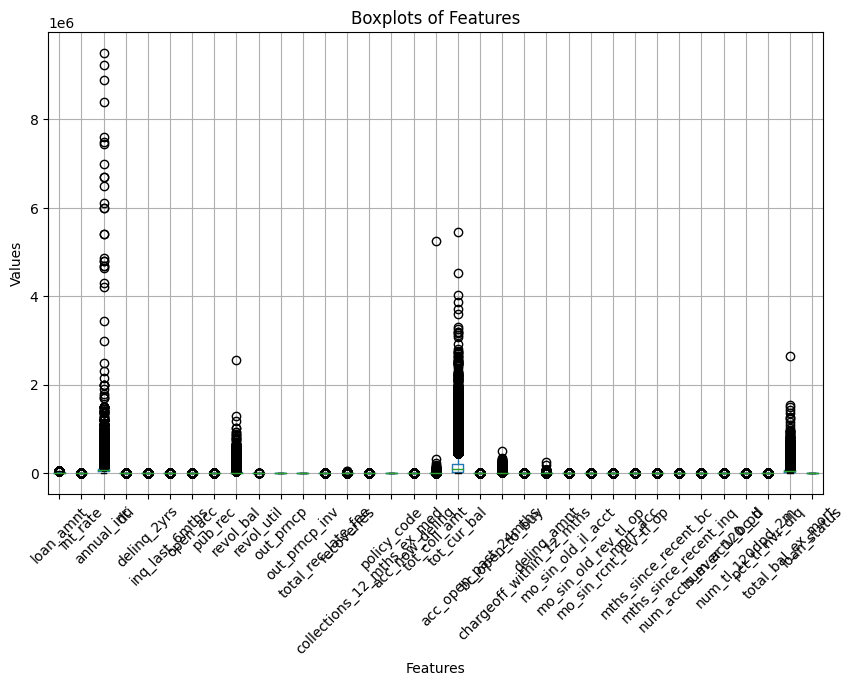

In [11]:
import matplotlib.pyplot as plt

dataframe_filtered.boxplot(figsize=(10, 6))  # Adjust figsize as needed
plt.title('Boxplots of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines for better visualization
plt.show()

Remove features

In [39]:
dataframe=pd.read_csv('/content/drive/My Drive/train.csv')

selected_features = [
    'loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status',
    'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',
    'initial_list_status', 'total_pymnt', 'mort_acc', 'total_rec_prncp',
    'bc_util', 'total_il_high_credit_limit', 'loan_status'
]


new_dataframe =dataframe[selected_features]  #This new dataframe contains only the selected features

In [96]:
new_dataframe.head()

,loan_amnt,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status
0,14000,36 months,7.35,44000.0,Not Verified,34.70,0.0,1.0,1067,f,15118.387808,0.0,14000.0,3.3,48043.0,1
1,2000,36 months,16.29,11420.0,Verified,20.61,0.0,1.0,4168,w,2541.534174,0.0,2000.0,93.0,0.0,1
2,5000,36 months,7.39,65000.0,Not Verified,11.04,0.0,0.0,1043,f,5455.927032,4.0,5000.0,1.6,21600.0,1
3,20600,36 months,11.99,46956.0,Source Verified,24.43,0.0,0.0,12355,f,24600.724807,2.0,20600.0,60.0,0.0,1
4,10000,36 months,7.39,115000.0,Source Verified,17.94,0.0,1.0,9402,w,10952.605895,0.0,10000.0,78.3,123535.0,1


# **Feature Encoding**

In [41]:
# Mapping dictionary
mapping = {" 36 months": 36, " 60 months": 60}

new_dataframe["term"] = new_dataframe["term"].map(mapping)

# Renaming the column to "term_binary"
new_dataframe.rename(columns={"term": "term"}, inplace=True)

(new_dataframe["term"])

<ipython-input-41-17614ba02301>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe["term"] = new_dataframe["term"].map(mapping)
<ipython-input-41-17614ba02301>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe.rename(columns={"term": "term"}, inplace=True)


0         36
1         36
2         36
3         36
4         36
          ..
517783    36
517784    36
517785    60
517786    36
517787    36
Name: term, Length: 517788, dtype: int64

In [42]:
new_dataframe

,loan_amnt,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status
0,14000,36,7.35,44000.00,Not Verified,34.70,0.0,1.0,1067,f,15118.387808,0.0,14000.00,3.3,48043.0,1
1,2000,36,16.29,11420.00,Verified,20.61,0.0,1.0,4168,w,2541.534174,0.0,2000.00,93.0,0.0,1
2,5000,36,7.39,65000.00,Not Verified,11.04,0.0,0.0,1043,f,5455.927032,4.0,5000.00,1.6,21600.0,1
3,20600,36,11.99,46956.00,Source Verified,24.43,0.0,0.0,12355,f,24600.724807,2.0,20600.00,60.0,0.0,1
4,10000,36,7.39,115000.00,Source Verified,17.94,0.0,1.0,9402,w,10952.605895,0.0,10000.00,78.3,123535.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517783,3600,36,20.31,48000.00,Verified,24.33,0.0,0.0,11641,f,1637.630000,0.0,705.73,25.9,36574.0,0
517784,8000,36,13.99,68789.76,Source Verified,30.08,0.0,0.0,2966,f,9506.516869,1.0,8000.00,74.8,107550.0,1
517785,14000,60,18.25,86000.00,Source Verified,31.02,0.0,0.0,26064,f,4004.600000,0.0,900.66,95.4,57411.0,0
517786,5200,36,17.27,70000.00,Verified,26.03,0.0,0.0,10852,f,6699.304817,1.0,5200.00,82.7,69590.0,1


In [43]:
# binary encoding for *initial_list_status_binary* column
# Mapping dictionary
mapping = {'f':1, 'w': 0}

# Applying binary encoding
new_dataframe['initial_list_status'] = new_dataframe['initial_list_status'].map(mapping)

new_dataframe['initial_list_status']

<ipython-input-43-95968e34eaef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataframe['initial_list_status'] = new_dataframe['initial_list_status'].map(mapping)


0         1
1         0
2         1
3         1
4         0
         ..
517783    1
517784    1
517785    1
517786    1
517787    0
Name: initial_list_status, Length: 517788, dtype: int64

In [58]:
one_hot_encoded = pd.get_dummies(new_dataframe['verification_status'])

# Concatenate the one-hot encoded columns with the original DataFrame
new_dataframe = pd.concat([new_dataframe.drop('verification_status', axis=1), one_hot_encoded], axis=1)



In [36]:
# Move 'loan_status' column to the first position
#column_order = ['loan_status'] + [col for col in df_final.columns if col != 'loan_status']
#df_final = df_final[column_order]

In [59]:
new_dataframe

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status,Not Verified,Source Verified,Verified
0,14000,36,7.35,44000.00,34.70,0.0,1.0,1067,1,15118.387808,0.0,14000.00,3.3,48043.0,1,1,0,0
1,2000,36,16.29,11420.00,20.61,0.0,1.0,4168,0,2541.534174,0.0,2000.00,93.0,0.0,1,0,0,1
2,5000,36,7.39,65000.00,11.04,0.0,0.0,1043,1,5455.927032,4.0,5000.00,1.6,21600.0,1,1,0,0
3,20600,36,11.99,46956.00,24.43,0.0,0.0,12355,1,24600.724807,2.0,20600.00,60.0,0.0,1,0,1,0
4,10000,36,7.39,115000.00,17.94,0.0,1.0,9402,0,10952.605895,0.0,10000.00,78.3,123535.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517783,3600,36,20.31,48000.00,24.33,0.0,0.0,11641,1,1637.630000,0.0,705.73,25.9,36574.0,0,0,0,1
517784,8000,36,13.99,68789.76,30.08,0.0,0.0,2966,1,9506.516869,1.0,8000.00,74.8,107550.0,1,0,1,0
517785,14000,60,18.25,86000.00,31.02,0.0,0.0,26064,1,4004.600000,0.0,900.66,95.4,57411.0,0,0,1,0
517786,5200,36,17.27,70000.00,26.03,0.0,0.0,10852,1,6699.304817,1.0,5200.00,82.7,69590.0,1,0,0,1


In [52]:
new_dataframe[['initial_list_status','term']]

,initial_list_status,term
0,1,36
1,0,36
2,1,36
3,1,36
4,0,36
...,...,...
517783,1,36
517784,1,36
517785,1,60
517786,1,36


In [54]:
from scipy.stats import zscore
import numpy as np



# Calculate the first quartile (Q1) and third quartile (Q3) for each feature
Q1 = new_dataframe.quantile(0.25)
Q3 = new_dataframe.quantile(0.75)

# Calculate the interquartile range (IQR) for each feature
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each feature
outliers = (new_dataframe < lower_bound) | (new_dataframe > upper_bound)

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outliers.sum())


<ipython-input-54-5913a8306085>:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = new_dataframe.quantile(0.25)
<ipython-input-54-5913a8306085>:14: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = new_dataframe.quantile(0.75)
<ipython-input-54-5913a8306085>:24: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (new_dataframe < lower_bound) | (new_dataframe > upper_bound)


Number of outliers for each feature:
annual_inc                     24087
bc_util                           17
delinq_2yrs                   100579
dti                             1993
initial_list_status                0
int_rate                        7430
loan_amnt                       2601
loan_status                        0
mort_acc                        6504
pub_rec                        89557
revol_bal                      30209
term                               0
total_il_high_credit_limit     24735
total_pymnt                    16322
total_rec_prncp                16132
verification_status                0
dtype: int64


## **Import Validation Data**

In [103]:
import pandas as pd
dataframe_valid = pd.read_csv('/content/drive/My Drive/valid.csv')


In [104]:
dataframe_valid.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14575,14575,14575.0,60 months,17.57,366.71,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,10000,10000,10000.0,36 months,13.59,339.79,C,C2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,17000,17000,17000.0,36 months,13.35,575.67,C,C2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,4500,4500,4500.0,36 months,9.93,145.06,B,B2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,6250,6250,6250.0,36 months,12.99,210.56,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [105]:

#Take only the selected features from the validation dataset
final_dataframe_valid = dataframe_valid[['loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status',    'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',    'initial_list_status', 'total_pymnt', 'mort_acc', 'total_rec_prncp',    'bc_util', 'total_il_high_credit_limit', 'loan_status']]


In [106]:
# Mapping dictionary
mapping = {" 36 months": 36, " 60 months": 60}

final_dataframe_valid["term"] = final_dataframe_valid["term"].map(mapping)

# Renaming the column to "term_binary"
final_dataframe_valid.rename(columns={"term": "term"}, inplace=True)

(final_dataframe_valid["term"])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0         60
1         36
2         36
3         36
4         36
          ..
172591    36
172592    36
172593    36
172594    36
172595    36
Name: term, Length: 172596, dtype: int64

In [107]:
# binary encoding initial_list_status_binary column
# Mapping dictionary
mapping = {'f': 1, 'w': 0}

# Applying binary encoding
final_dataframe_valid['initial_list_status'] = final_dataframe_valid['initial_list_status'].map(mapping)

final_dataframe_valid['initial_list_status']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0         1
1         0
2         0
3         1
4         1
         ..
172591    1
172592    0
172593    0
172594    0
172595    0
Name: initial_list_status, Length: 172596, dtype: int64

In [108]:
one_hot_encoded = pd.get_dummies(final_dataframe_valid['verification_status'])

# Concatenate the one-hot encoded columns with the original DataFrame
final_dataframe_valid = pd.concat([final_dataframe_valid.drop('verification_status', axis=1), one_hot_encoded], axis=1)

final_dataframe_valid

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status,Not Verified,Source Verified,Verified
0,14575,60,17.57,36500.0,20.55,0.0,0.0,14147,1,21968.927620,0.0,14575.0,81.8,16696.0,1,0,1,0
1,10000,36,13.59,66000.0,14.73,0.0,2.0,1302,0,11713.852323,0.0,10000.0,33.3,33832.0,1,0,1,0
2,17000,36,13.35,65000.0,25.06,0.0,0.0,12295,0,20681.812088,1.0,17000.0,91.4,68601.0,1,0,0,1
3,4500,36,9.93,21600.0,11.39,0.0,1.0,5357,1,4602.174334,0.0,4500.0,19.7,0.0,1,0,1,0
4,6250,36,12.99,35000.0,11.49,0.0,0.0,9811,1,7430.460000,0.0,6250.0,19.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172591,30000,36,22.90,108000.0,45.08,0.0,0.0,40042,1,30022.521667,1.0,30000.0,103.1,221682.0,1,1,0,0
172592,5000,36,12.49,33000.0,27.89,0.0,1.0,8017,0,6009.916175,1.0,5000.0,33.9,51931.0,1,0,1,0
172593,13000,36,7.89,49000.0,22.46,0.0,0.0,27516,0,14602.612390,0.0,13000.0,82.0,43118.0,1,1,0,0
172594,35000,36,12.99,100000.0,19.33,3.0,1.0,34694,0,13236.350000,2.0,6902.8,69.0,14820.0,0,0,0,1


# **XG boost**

In [109]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train = df_final.drop('loan_status', axis=1)
y_train = df_final['loan_status']

X_valid = final_dataframe_valid.drop('loan_status', axis=1)
y_valid =final_dataframe_valid['loan_status']

# Convert datasets into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'logloss'  # Logarithmic Loss as evaluation metric
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions on validation data
y_pred = model.predict(dvalid)

# Convert probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_binary)
print("Validation Accuracy:", accuracy)


[0]	validation-logloss:0.37384
[1]	validation-logloss:0.25660
[2]	validation-logloss:0.18399
[3]	validation-logloss:0.13475
[4]	validation-logloss:0.10038
[5]	validation-logloss:0.07649
[6]	validation-logloss:0.05934
[7]	validation-logloss:0.04559
[8]	validation-logloss:0.03649
[9]	validation-logloss:0.02993
[10]	validation-logloss:0.02504
[11]	validation-logloss:0.02151
[12]	validation-logloss:0.01879
[13]	validation-logloss:0.01659
[14]	validation-logloss:0.01520
[15]	validation-logloss:0.01397
[16]	validation-logloss:0.01305
[17]	validation-logloss:0.01260
[18]	validation-logloss:0.01171
[19]	validation-logloss:0.01100
[20]	validation-logloss:0.01043
[21]	validation-logloss:0.00996
[22]	validation-logloss:0.00946
[23]	validation-logloss:0.00911
[24]	validation-logloss:0.00881
[25]	validation-logloss:0.00864
[26]	validation-logloss:0.00844
[27]	validation-logloss:0.00812
[28]	validation-logloss:0.00794
[29]	validation-logloss:0.00770
[30]	validation-logloss:0.00763
[31]	validation-lo

## **Importing Test Data**

In [115]:
import pandas as pd
dataframe_test = pd.read_csv('/content/drive/My Drive/X_test.csv')
dataframe_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,8100,8100,8100.0,36 months,11.47,267.00,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,36 months,12.99,336.90,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,9450,9450,9450.0,36 months,13.67,321.47,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,24975.0,36 months,17.49,897.43,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,16000,16000,16000.0,60 months,14.99,380.56,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
final_df_test = dataframe_test[ [ 'loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status',    'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',    'initial_list_status', 'total_pymnt', 'mort_acc', 'total_rec_prncp',    'bc_util', 'total_il_high_credit_limit']]
final_df_test

,loan_amnt,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit
0,8100,36 months,11.47,34000.0,Source Verified,18.11,0.0,0.0,4767,w,8146.460000,0.0,8100.00,49.4,12000.0
1,10000,36 months,12.99,120000.0,Source Verified,13.48,0.0,0.0,13104,w,1966.540000,0.0,693.40,58.0,54811.0
2,9450,36 months,13.67,65000.0,Verified,14.83,0.0,1.0,3731,w,10328.803125,5.0,9450.00,73.2,71783.0
3,25000,36 months,17.49,80400.0,Verified,10.82,2.0,0.0,6176,f,32307.326877,NaN,25000.00,NaN,NaN
4,16000,60 months,14.99,58000.0,Verified,15.60,0.0,0.0,14964,w,12368.960000,4.0,6268.46,64.4,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172591,7000,36 months,18.25,30000.0,Source Verified,27.60,0.0,0.0,6874,f,8583.400004,0.0,7000.00,34.0,52264.0
172592,12500,36 months,12.49,33000.0,Not Verified,23.13,0.0,0.0,21262,f,14297.000000,0.0,12500.00,86.4,16945.0
172593,30000,36 months,7.89,180000.0,Source Verified,13.25,0.0,0.0,63875,w,33798.142333,2.0,30000.00,76.2,30966.0
172594,3500,36 months,8.59,45000.0,Not Verified,24.27,1.0,0.0,5341,w,3846.877807,4.0,3500.00,19.6,53171.0


In [117]:
# Mapping dictionary
mapping = {" 36 months": 36, " 60 months": 60}

final_df_test["term"] = final_df_test["term"].map(mapping)
final_df_test.rename(columns={"term": "term"}, inplace=True)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [118]:
# binary encoding initial_list_status_binary column
# Mapping dictionary
mapping = {'f': 1, 'w': 0}

# Applying binary encoding
final_df_test['initial_list_status'] = final_df_test['initial_list_status'].map(mapping)

final_df_test['initial_list_status']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0         0
1         0
2         0
3         1
4         0
         ..
172591    1
172592    1
172593    0
172594    0
172595    0
Name: initial_list_status, Length: 172596, dtype: int64

In [119]:
one_hot_encoded = pd.get_dummies(final_df_test['verification_status'])

# Concatenate the one-hot encoded columns with the original DataFrame
final_df_test = pd.concat([final_df_test.drop('verification_status', axis=1), one_hot_encoded], axis=1)

final_df_test

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,Not Verified,Source Verified,Verified
0,8100,36,11.47,34000.0,18.11,0.0,0.0,4767,0,8146.460000,0.0,8100.00,49.4,12000.0,0,1,0
1,10000,36,12.99,120000.0,13.48,0.0,0.0,13104,0,1966.540000,0.0,693.40,58.0,54811.0,0,1,0
2,9450,36,13.67,65000.0,14.83,0.0,1.0,3731,0,10328.803125,5.0,9450.00,73.2,71783.0,0,0,1
3,25000,36,17.49,80400.0,10.82,2.0,0.0,6176,1,32307.326877,NaN,25000.00,NaN,NaN,0,0,1
4,16000,60,14.99,58000.0,15.60,0.0,0.0,14964,0,12368.960000,4.0,6268.46,64.4,4000.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172591,7000,36,18.25,30000.0,27.60,0.0,0.0,6874,1,8583.400004,0.0,7000.00,34.0,52264.0,0,1,0
172592,12500,36,12.49,33000.0,23.13,0.0,0.0,21262,1,14297.000000,0.0,12500.00,86.4,16945.0,1,0,0
172593,30000,36,7.89,180000.0,13.25,0.0,0.0,63875,0,33798.142333,2.0,30000.00,76.2,30966.0,0,1,0
172594,3500,36,8.59,45000.0,24.27,1.0,0.0,5341,0,3846.877807,4.0,3500.00,19.6,53171.0,1,0,0


In [120]:
# Convert test dataset into DMatrix format
dtest = xgb.DMatrix(final_df_test)

# Make predictions on test data
y_pred_test = model.predict(dtest)

# Convert probabilities to binary predictions
y_pred_test_binary = [1 if pred > 0.5 else 0 for pred in y_pred_test]

In [121]:
import pandas as pd

# Convert the binary predictions to a pandas DataFrame
predictions_df = pd.DataFrame(y_pred_test_binary, columns=['predicted_loan_status'])

# Concatenate the predictions DataFrame to the front of final_df_test
final_df_test_with_predictions = pd.concat([predictions_df, final_df_test], axis=1)

final_df_test_with_predictions

,predicted_loan_status,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,Not Verified,Source Verified,Verified
0,1,8100,36,11.47,34000.0,18.11,0.0,0.0,4767,0,8146.460000,0.0,8100.00,49.4,12000.0,0,1,0
1,0,10000,36,12.99,120000.0,13.48,0.0,0.0,13104,0,1966.540000,0.0,693.40,58.0,54811.0,0,1,0
2,1,9450,36,13.67,65000.0,14.83,0.0,1.0,3731,0,10328.803125,5.0,9450.00,73.2,71783.0,0,0,1
3,1,25000,36,17.49,80400.0,10.82,2.0,0.0,6176,1,32307.326877,NaN,25000.00,NaN,NaN,0,0,1
4,0,16000,60,14.99,58000.0,15.60,0.0,0.0,14964,0,12368.960000,4.0,6268.46,64.4,4000.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172591,1,7000,36,18.25,30000.0,27.60,0.0,0.0,6874,1,8583.400004,0.0,7000.00,34.0,52264.0,0,1,0
172592,1,12500,36,12.49,33000.0,23.13,0.0,0.0,21262,1,14297.000000,0.0,12500.00,86.4,16945.0,1,0,0
172593,1,30000,36,7.89,180000.0,13.25,0.0,0.0,63875,0,33798.142333,2.0,30000.00,76.2,30966.0,0,1,0
172594,1,3500,36,8.59,45000.0,24.27,1.0,0.0,5341,0,3846.877807,4.0,3500.00,19.6,53171.0,1,0,0


In [122]:
csv_file_path = '/content/drive/My Drive/Output_210735U.csv'

# Save the dataframe as a CSV file
final_df_test_with_predictions.to_csv(csv_file_path, index=False)

In [124]:
pip install shap

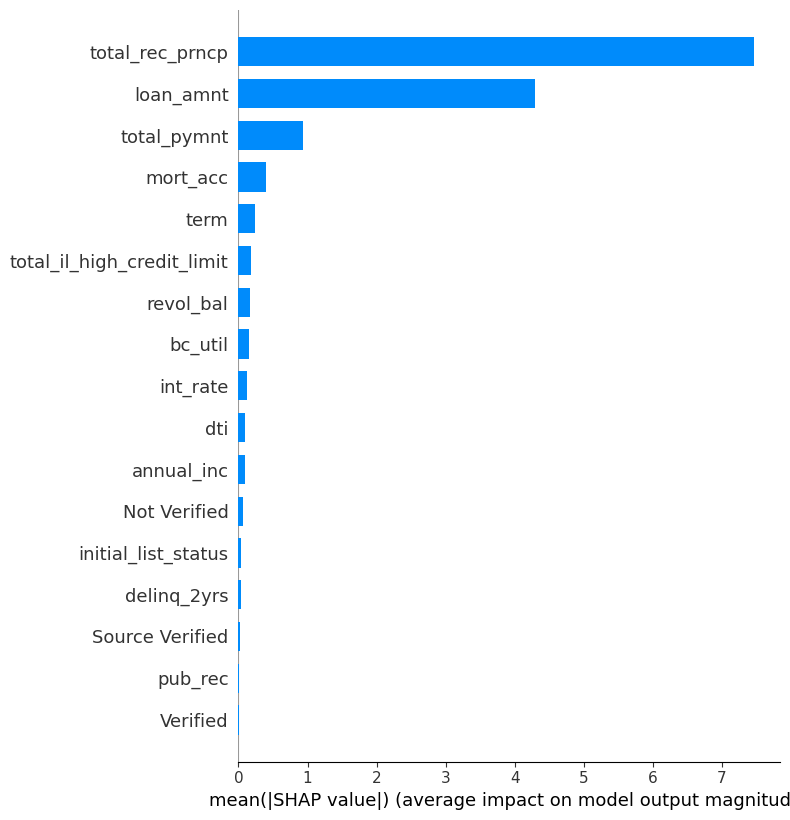

In [125]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)